In [33]:
import torch
torch.manual_seed(22)

In [34]:
n = 1
A = torch.randn(n,3,3)
matrixs = []
for i in range(n):
    U, S, V = torch.linalg.svd(A[i,:,:], full_matrices=False)
    B = U @ V # msign
    matrixs.append(A[i,:,:])
    matrixs.append(B)

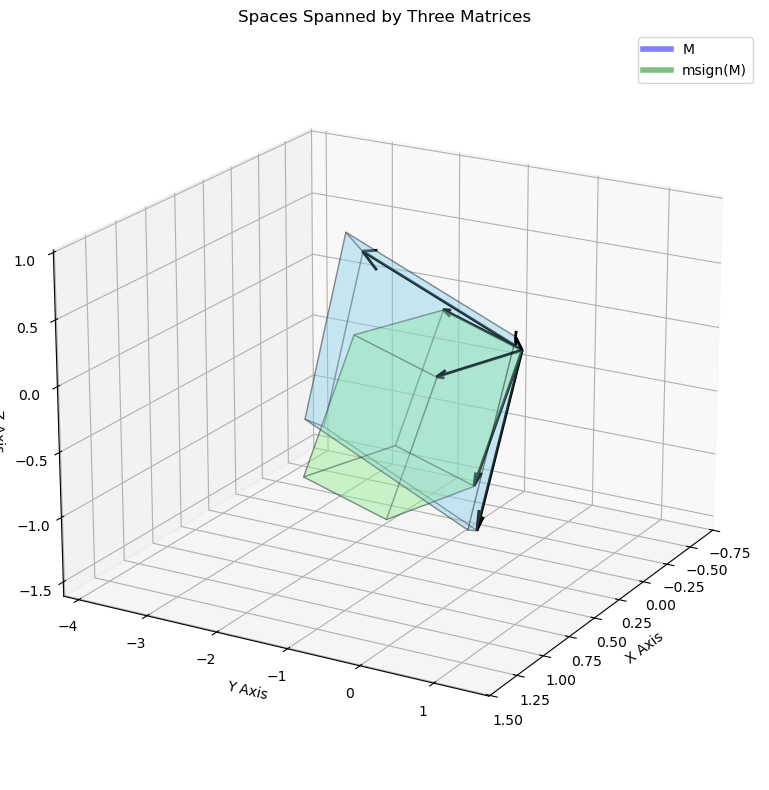

In [35]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# 创建图形和3D坐标轴
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成平行六面体的顶点
def generate_parallelepiped(vectors):
    # 顶点列表 (8个顶点)
    vertices = np.zeros((8, 3))
    # 生成所有顶点组合
    for i, (a, b, c) in enumerate([(x, y, z) for x in [0,1] for y in [0,1] for z in [0,1]]):
        vertices[i] = a * vectors[:,0] + b * vectors[:,1] + c * vectors[:,2]
    return vertices

# 定义平行六面体的面 (6个面)
faces = [
    [0, 1, 3, 2],  # 底面
    [4, 5, 7, 6],  # 顶面
    [0, 1, 5, 4],  # 前面
    [2, 3, 7, 6],  # 后面
    [0, 2, 6, 4],  # 左面
    [1, 3, 7, 5]   # 右面
]

# 绘制三个平行六面体
colors = ['skyblue', 'lightgreen']
labels = ['M', 'msign(M)', ]

for idx, matrix in enumerate(matrixs):
    # 生成顶点
    vertices = generate_parallelepiped(matrix)
    
    # 绘制边
    for face in faces:
        x = [vertices[i][0] for i in face]
        y = [vertices[i][1] for i in face]
        z = [vertices[i][2] for i in face]
        poly = Poly3DCollection([list(zip(x, y, z))], alpha=0.25, edgecolor='black')
        poly.set_facecolor(colors[idx % 2])
        ax.add_collection3d(poly)
    
    # 绘制向量箭头
    for i in range(3):
        ax.quiver(0, 0, 0, 
                  matrix[0, i], matrix[1, i], matrix[2, i], 
                  color= 'black', lw=2, arrow_length_ratio=0.1)

# 设置坐标轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 设置标题和图例
plt.title('Spaces Spanned by Three Matrices')
ax.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=4, alpha=0.5, label=labels[0]),
    plt.Line2D([0], [0], color='green', lw=4, alpha=0.5, label=labels[1]),
])

# 调整视角以便更好地观察
ax.view_init(elev=20, azim=30)

# 显示图形
plt.tight_layout()
plt.show()